['台北', '高雄', '台中', '桃園', '新竹', '彰化', '台南', '苗栗', '雲林', '嘉義', '屏東', '宜蘭', '南投', '台東', '花蓮', '澎湖']


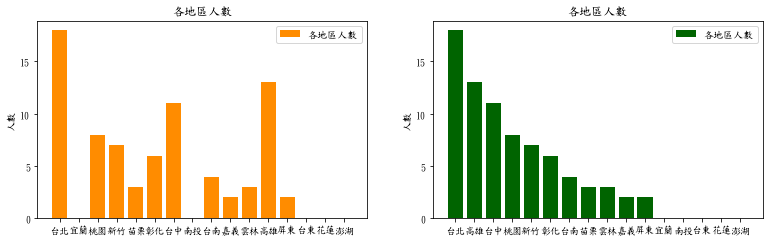

In [3]:
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
import xlrd
import xlwt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
file_r = "野村證券CRM.xlsx" #資料們
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(1)
onshore_postcode_list = []
onshore_sddress_list = []
tw = {"台北":0,"宜蘭":0,"桃園":0,"新竹":0,"苗栗":0,"彰化":0,"台中":0,"南投":0,"台南":0,"嘉義":0,"雲林":0,"高雄":0,"屏東":0,"台東":0,"花蓮":0,"澎湖":0}
# 讀取文件
for p in range(1,101):
    on_postcode = sheet_1.cell_value(rowx=p,colx=17)
    onshore_postcode_list.append(on_postcode)
    on_adr = sheet_1.cell_value(rowx=p,colx=18)
    onshore_sddress_list.append(on_adr)
    # email_name = sheet_1.cell_value(rowx=p,colx=2)
    # email_list.append(email_name)
#print(onshore_postcode_list)
for i in tw:
    for on_po in onshore_sddress_list:
        if i in on_po:
            tw[str(i)] = tw[str(i)]+1  
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
plt.subplots(figsize=(13, 8)) #圖形大小
ax1 = plt.subplot(2,2,1)
#第一行第二列图形
ax2 = plt.subplot(2,2,2)
#选择ax1
plt.sca(ax1)
tw_place1 = [*tw] #抓出tw dict的keys
plt.bar(tw_place1, list(tw.values()),color = 'darkorange', label='各地區人數')
plt.legend(loc='lower left')
plt.ylabel('人數')
plt.title("各地區人數")
yaxis = np.arange(0,20,5)
#plt.ylim(0,20)
plt.yticks(yaxis)
plt.legend()
plt.sca(ax2)
sort_tw_value = list(tw.values())
sort_tw_value.sort(reverse=True)
sort_tw = [[k, tw[k]] for k in sorted(tw, key=tw.get, reverse=True)] 
# sort value後，以list方式儲存
#print(sort_tw)
sort_tw_place = []
for h in range(len(sort_tw)):
    sort_tw_place.append(sort_tw[h][0])
print(sort_tw_place)
plt.bar(sort_tw_place, sort_tw_value,color = 'darkgreen', label='各地區人數')
plt.legend(loc='lower left')
plt.ylabel('人數')
plt.title("各地區人數")
yaxis = np.arange(0,20,5)
plt.yticks(yaxis)
plt.legend()
#plt.savefig('C:\\Users\\Will\\Desktop\\MACD6.png') #存成圖檔
plt.show()
#print(tw)